In [1]:

import pandas as pd
import os
import datetime as dt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression, Lasso, Ridge, ElasticNet, TweedieRegressor 
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours, TomekLinks
from collections import Counter  
from imblearn.datasets import make_imbalance  
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from time import time
import packages.modelado as MD
from elasticsearch import Elasticsearch
from csv import DictReader
import os

/tmp/ipykernel_2656/1977088918.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Cargar Train y Test

In [2]:
train=pd.read_csv(os.path.join("./Datos/Transformados/df_train.csv"))
test=pd.read_csv(os.path.join("./Datos/Transformados/df_test.csv"))

In [3]:
ytr=train.iloc[:,-1]
xtr=train.iloc[:,0:-1]
yte=test.iloc[:,-1]
xte=test.iloc[:,0:-1]
RANDOM_STATE=0

# Filtramos modelos con accuracy alto

In [4]:
ELASTIC_PASSWORD ='2YVO0+eOKT26mMmpynP3' #haritz

client=Elasticsearch(
    "https://localhost:9200",
    ca_certs="/home/bdata2/elasticsearch-8.4.3/config/certs/http_ca.crt",
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

client.info()

ObjectApiResponse({'name': 'bdata2-VirtualBox', 'cluster_name': 'elasticsearch', 'cluster_uuid': '6XmqEv5uSK-hr779sbmGdg', 'version': {'number': '8.4.3', 'build_flavor': 'default', 'build_type': 'tar', 'build_hash': '42f05b9372a9a4a470db3b52817899b99a76ee73', 'build_date': '2022-10-04T07:17:24.662462378Z', 'build_snapshot': False, 'lucene_version': '9.3.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [5]:
resp=client.search(index="prueba_resultados_modelos", query={"range":{"highest_score":{"gte":0.94}}})
print(resp['hits']['total']['value'])
for i in range(0,resp['hits']['total']['value']):
    print(resp['hits']['hits'][i]['_source'])

6
{'model_used': 'LogisticRegression(max_iter=10000)', 'highest_score': 0.9432512728799022, 'best hyperparameters': "{'C': 1}", 'balanceo': 'sin_balanceo', 'segundos': 6.162464380264282, 'hora_subida': '2023-01-21T23:50:46.591354'}
{'model_used': 'SVC()', 'highest_score': 0.9416297425041517, 'best hyperparameters': "{'C': 2, 'kernel': 'rbf'}", 'balanceo': 'sin_balanceo', 'segundos': 22.04225254058838, 'hora_subida': '2023-01-21T23:51:02.471143'}
{'model_used': 'LogisticRegression(max_iter=10000)', 'highest_score': 0.9717107278759208, 'best hyperparameters': "{'C': 20}", 'balanceo': 'SMOTEENN(random_state=0)', 'segundos': 11.043448209762573, 'hora_subida': '2023-01-21T23:51:16.769702'}
{'model_used': 'SVC()', 'highest_score': 0.9752880203780748, 'best hyperparameters': "{'C': 3, 'kernel': 'rbf'}", 'balanceo': 'SMOTEENN(random_state=0)', 'segundos': 29.25637149810791, 'hora_subida': '2023-01-21T23:51:34.982625'}
{'model_used': 'LogisticRegression(max_iter=10000)', 'highest_score': 0.9429

# APLICAR MODELO FINAL

DATOS DESBALANCEADOS
False    5735
True     1666
Name: cancellation, dtype: int64
DATOS BALANCEADOS
True     4754
False    4189
Name: cancellation, dtype: int64
La precision media es de : 0.9416955562559093
EL area bajo la curva de ROC es de : 0.8833687602735278
Classification report for classifier LogisticRegression(C=20, max_iter=10000, random_state=0):
              precision    recall  f1-score   support

       False     0.9387    0.9894    0.9634      2459
        True     0.9552    0.7773    0.8571       714

    accuracy                         0.9417      3173
   macro avg     0.9470    0.8834    0.9103      3173
weighted avg     0.9424    0.9417    0.9395      3173


Confusion matrix:
[[2433   26]
 [ 159  555]]


/home/bdata2/anaconda3/envs/morado_reto06/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


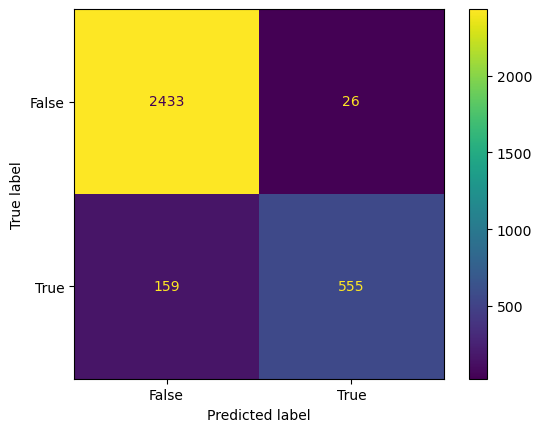

In [4]:
MD.modelo_final(LogisticRegression(max_iter=10000, C=20, random_state=RANDOM_STATE), SMOTEENN(random_state=0),xtr,ytr,xte, yte)

DATOS DESBALANCEADOS
False    5735
True     1666
Name: cancellation, dtype: int64
DATOS BALANCEADOS
True     4754
False    4189
Name: cancellation, dtype: int64
La precision media es de : 0.9375984872360542
EL area bajo la curva de ROC es de : 0.8837070818567361
Classification report for classifier SVC(C=3):
              precision    recall  f1-score   support

       False     0.9404    0.9817    0.9606      2459
        True     0.9257    0.7857    0.8500       714

    accuracy                         0.9376      3173
   macro avg     0.9331    0.8837    0.9053      3173
weighted avg     0.9371    0.9376    0.9357      3173


Confusion matrix:
[[2414   45]
 [ 153  561]]


/home/bdata2/anaconda3/envs/morado_reto06/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


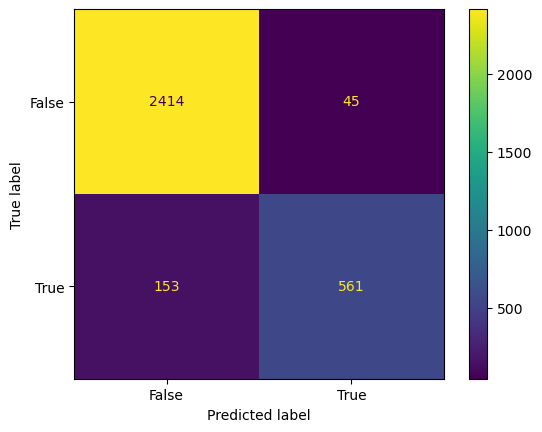

In [5]:
MD.modelo_final(SVC(kernel="rbf", C=3), SMOTEENN(random_state=0),xtr,ytr,xte, yte)

La precision media es de : 0.9432713520327766
EL area bajo la curva de ROC es de : 0.8799129249096954
Classification report for classifier LogisticRegression(C=1, max_iter=10000, random_state=0):
              precision    recall  f1-score   support

       False     0.9358    0.9951    0.9645      2459
        True     0.9785    0.7647    0.8585       714

    accuracy                         0.9433      3173
   macro avg     0.9571    0.8799    0.9115      3173
weighted avg     0.9454    0.9433    0.9407      3173


Confusion matrix:
[[2447   12]
 [ 168  546]]


/home/bdata2/anaconda3/envs/morado_reto06/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


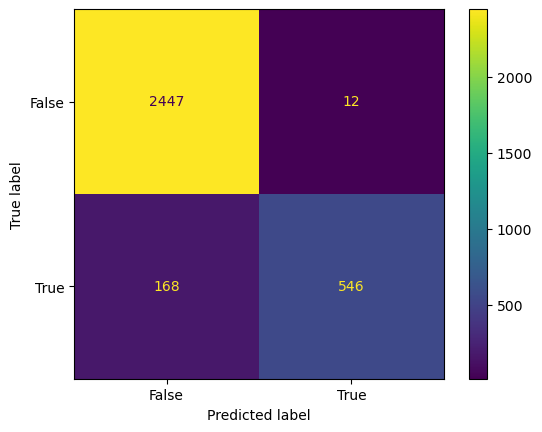

In [6]:
MD.modelo_final_sin_balanceo(LogisticRegression(max_iter=10000, C=1, random_state=RANDOM_STATE),xtr,ytr,xte, yte)

DATOS DESBALANCEADOS
False    5735
True     1666
Name: cancellation, dtype: int64
DATOS BALANCEADOS
False    5697
True     1666
Name: cancellation, dtype: int64
La precision media es de : 0.9432713520327766
EL area bajo la curva de ROC es de : 0.8799129249096954
Classification report for classifier LogisticRegression(C=1, max_iter=10000, random_state=0):
              precision    recall  f1-score   support

       False     0.9358    0.9951    0.9645      2459
        True     0.9785    0.7647    0.8585       714

    accuracy                         0.9433      3173
   macro avg     0.9571    0.8799    0.9115      3173
weighted avg     0.9454    0.9433    0.9407      3173


Confusion matrix:
[[2447   12]
 [ 168  546]]


/home/bdata2/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


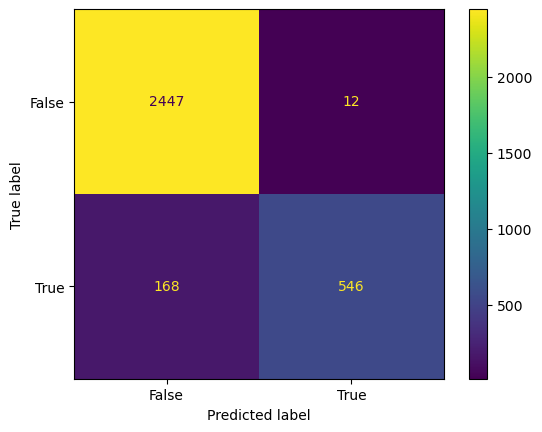

In [9]:
MD.modelo_final(LogisticRegression(max_iter=10000, C=1, random_state=RANDOM_STATE), TomekLinks(),xtr,ytr,xte, yte)

La precision media es de : 0.9423258745666562
EL area bajo la curva de ROC es de : 0.8783090299967079
Classification report for classifier SVC(C=2):
              precision    recall  f1-score   support

       False     0.9350    0.9947    0.9639      2459
        True     0.9767    0.7619    0.8560       714

    accuracy                         0.9423      3173
   macro avg     0.9558    0.8783    0.9100      3173
weighted avg     0.9444    0.9423    0.9397      3173


Confusion matrix:
[[2446   13]
 [ 170  544]]


/home/bdata2/anaconda3/envs/morado_reto06/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


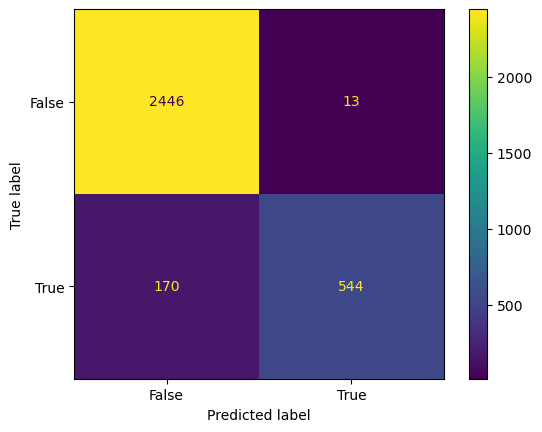

In [8]:
MD.modelo_final_sin_balanceo(SVC(C=2, kernel="rbf"),xtr,ytr,xte, yte)

DATOS DESBALANCEADOS
False    5735
True     1666
Name: cancellation, dtype: int64
DATOS BALANCEADOS
False    5697
True     1666
Name: cancellation, dtype: int64
La precision media es de : 0.9423258745666562
EL area bajo la curva de ROC es de : 0.8783090299967079
Classification report for classifier SVC(C=3, random_state=0):
              precision    recall  f1-score   support

       False     0.9350    0.9947    0.9639      2459
        True     0.9767    0.7619    0.8560       714

    accuracy                         0.9423      3173
   macro avg     0.9558    0.8783    0.9100      3173
weighted avg     0.9444    0.9423    0.9397      3173


Confusion matrix:
[[2446   13]
 [ 170  544]]


/home/bdata2/anaconda3/envs/morado_reto06/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


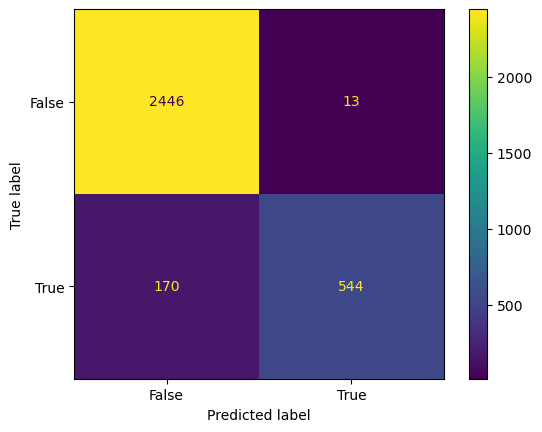

In [9]:
MD.modelo_final(SVC(kernel="rbf", C=3, random_state=RANDOM_STATE), TomekLinks(),xtr,ytr,xte, yte)

# Coeficientes

In [14]:
coef=MD.coeficientes_logis(LogisticRegression(max_iter=10000, C=20, random_state=RANDOM_STATE), SMOTEENN(random_state=0), xtr, ytr)

In [15]:
coef

,columna,coeficiente
27,otro,-8.755209
24,niebla,-8.742932
7,25-35,-8.380008
10,65-80,-8.314309
9,50-65,-7.694037
6,18-24,-7.673560
8,35-50,-7.474636
22,lluvia,-7.412203
20,non_refundable,-7.403674
33,apartment,-7.344810
